# Step 1: Setting Up the Environment


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import ConfusionMatrixDisplay

# Set random seed for reproducibility
np.random.seed(42)

# Step 2: Setting Up the Dataset
Create a synthetic dataset to demonstrate boosting's power.

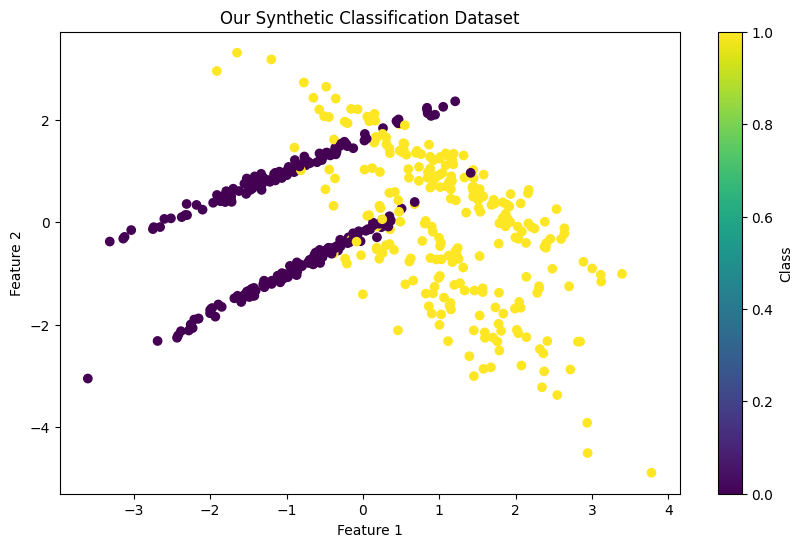

In [ ]:
# Create synthetic dataset
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    random_state=42
)

# Visualize the raw data
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Our Synthetic Classification Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Class')
plt.show()

# Step 3: Training the Initial Weak Learner
Start with a simple decision tree to establish our baseline.


Weak Learner Performance:
Initial Accuracy: 0.890


<Figure size 800x600 with 0 Axes>

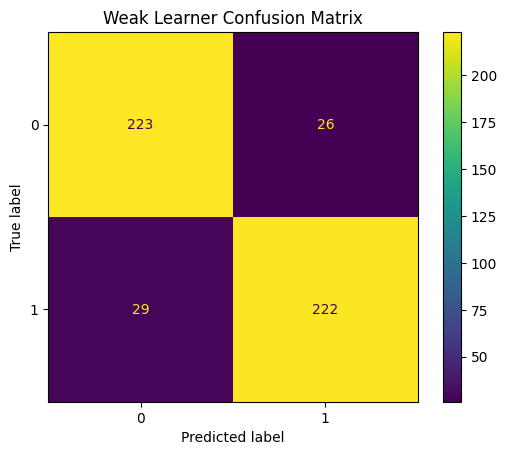

In [ ]:
# Initialize and train weak learner
weak_learner = DecisionTreeClassifier(max_depth=1, random_state=42)
weak_learner.fit(X, y)

# Evaluate weak learner
y_pred_initial = weak_learner.predict(X)
initial_accuracy = accuracy_score(y, y_pred_initial)
print(f"\nWeak Learner Performance:")
print(f"Initial Accuracy: {initial_accuracy:.3f}")

# Visualize weak learner predictions
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_predictions(y, y_pred_initial)
plt.title('Weak Learner Confusion Matrix')
plt.show()


# Step 4: Implementing Boosting with AdaBoost
Transform our weak learner into a strong predictor using AdaBoost.



In [ ]:
# Train AdaBoost
ada_boost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
ada_boost.fit(X, y)

# Evaluate AdaBoost
y_pred_ada = ada_boost.predict(X)
ada_accuracy = accuracy_score(y, y_pred_ada)
print(f"\nAdaBoost Performance:")
print(f"AdaBoost Accuracy: {ada_accuracy:.3f}")


AdaBoost Performance:
AdaBoost Accuracy: 0.898


# Step 5: Visualizing the Sequential Learning Process
See how AdaBoost improves predictions over iterations.

<Figure size 800x600 with 0 Axes>

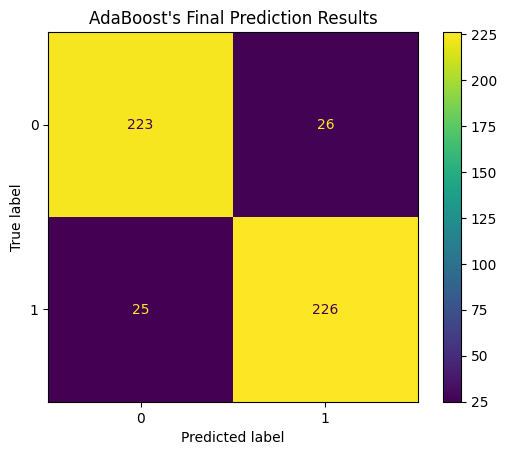

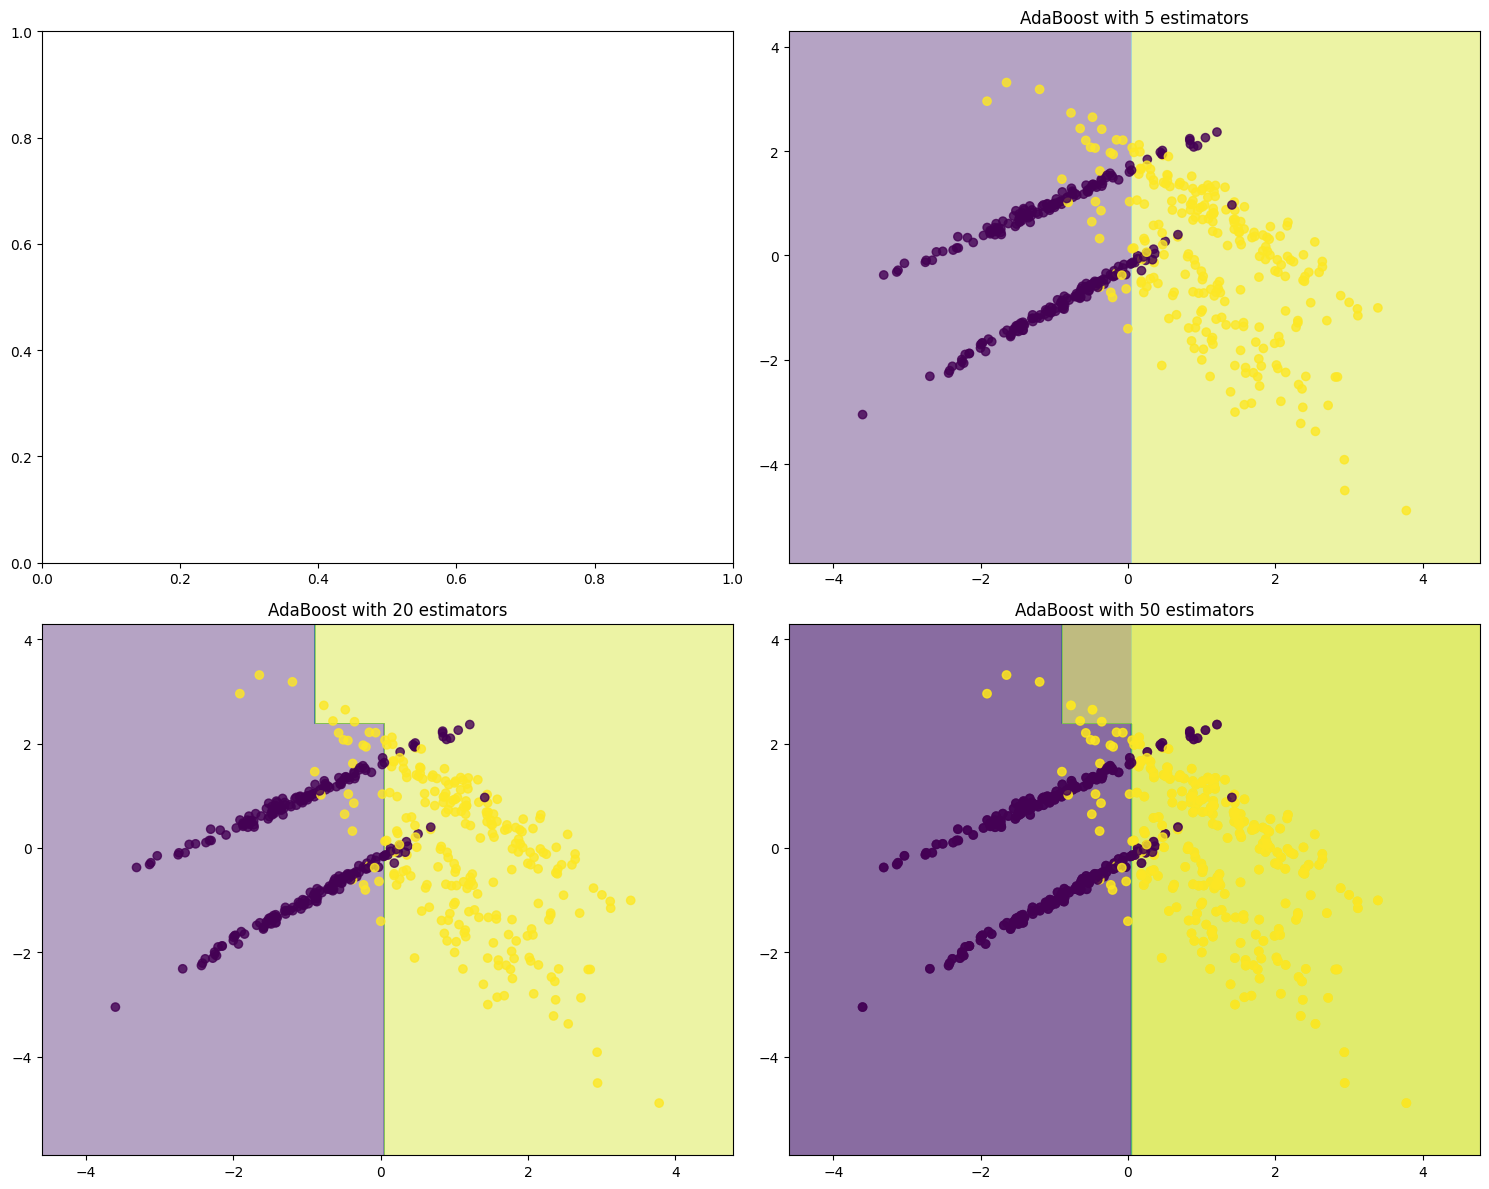

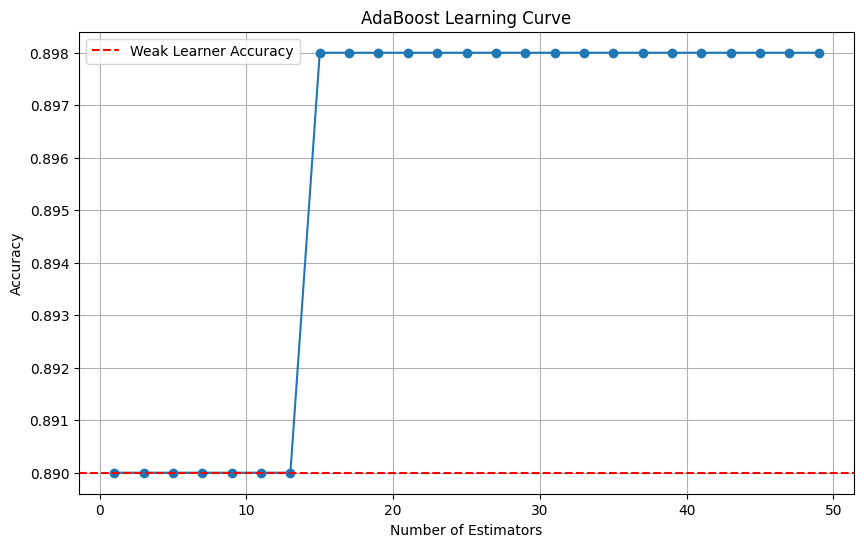

In [ ]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(ada_boost, X, y)
plt.title("AdaBoost's Final Prediction Results")
plt.show()

# Visualize decision boundaries evolution
# =====================================

def plot_decision_boundary(classifier, X, y, title):
    """Helper function to plot decision boundaries"""
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)

# Plot decision boundaries evolution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Weak learner
plot_decision_boundary(weak_learner, X, y, "Weak Learner")
plt.subplot(221)

# AdaBoost with different numbers of estimators
for idx, n_est in enumerate([5, 20, 50]):
    boost = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_est,
        random_state=42
    )
    boost.fit(X, y)
    plt.subplot(222 + idx)
    plot_decision_boundary(boost, X, y, f"AdaBoost with {n_est} estimators")

plt.tight_layout()
plt.show()


In [ ]:

# Plot learning curve
# =====================================

n_estimators_range = range(1, 51, 2)
accuracies = []

for n_est in n_estimators_range:
    boost = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=n_est,
        random_state=42
    )
    boost.fit(X, y)
    accuracies.append(accuracy_score(y, boost.predict(X)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.axhline(y=initial_accuracy, color='r', linestyle='--',
            label='Weak Learner Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Learning Curve')
plt.legend()
plt.grid(True)
plt.show()